# R10H41003-HW2-游筑鈞

##  <font color=blue>Answer the questions marked blue boldface in my report, Thks.</font>

In [1]:
import os, time, glob, socket
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import csv
import pickle
path=os.getcwd()
pd.set_option("display.max_columns", None)
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score,accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_roc_curve,roc_curve
from sklearn.metrics import average_precision_score, precision_recall_curve
from sklearn.metrics import auc, plot_precision_recall_curve

### Read Data

In [3]:
df = pd.read_csv("Data.csv") 
print(df.shape)
df.head()

(1400, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,127459.0,-0.489190,0.783289,-1.659097,-1.366814,2.576846,3.513254,0.271305,1.304641,-0.238853,-0.730979,-0.451649,0.280989,-0.341062,0.781812,0.079439,-0.669977,-0.057892,-0.515120,0.411775,0.055555,-0.058456,-0.214896,0.222998,0.675950,-0.632860,-0.530017,0.345872,0.221294,53.70,0
1,128505.0,1.293556,-1.302381,-2.241085,0.393974,0.680825,0.821662,0.501478,0.104208,0.111651,0.087403,0.899220,0.616466,-0.669651,0.959340,0.391294,-0.673217,0.067627,-1.040020,-0.740516,0.358658,0.359432,0.443179,-0.230091,-1.583791,-0.157257,0.477317,-0.104101,-0.039292,347.90,0
2,128393.0,-0.755894,0.121305,0.852314,-2.303416,-0.233670,-0.244191,-0.285440,0.424009,-1.072689,-0.548953,-1.368494,-0.322031,1.189614,-0.518429,-0.626944,1.518541,-0.160520,-0.993212,-0.074787,0.065290,0.438709,1.034433,-0.232698,0.531213,0.100623,-0.203575,-0.007693,0.050117,24.99,0
3,128738.0,2.038750,-0.159488,-1.096570,0.425224,-0.214944,-1.151940,0.107112,-0.250273,0.701067,0.092863,-0.872904,-0.109839,-1.007940,0.495529,0.205622,-0.112675,-0.170368,-0.825894,0.079155,-0.284541,-0.291320,-0.766838,0.353433,-0.042129,-0.352271,0.203878,-0.075910,-0.061540,8.99,0
4,140293.0,0.951025,3.252926,-5.039105,4.632411,3.014501,-1.349570,0.980940,-1.819539,-2.099049,-1.347557,2.680578,-1.462945,-0.705397,-7.445296,-0.561332,3.139656,5.665429,3.790316,-1.909799,-0.381444,1.404524,-0.760549,0.358292,-1.185942,-1.286177,0.000365,0.169662,0.108276,0.77,1


In [4]:
Y=df.Class
X=df.drop(['Class'], axis=1)

In [5]:
X_train, X_val, y_train, y_val = train_test_split(X, Y, test_size=0.2)
print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)

(1120, 30)
(1120,)
(280, 30)
(280,)


# 1-(i)

Please construct a DNN for binary classification according to the cross-entropy error
function

You should decide the following hyperparameters: 
- number of hidden layers
- number of hidden units
- learning rate
- number of iterations 
- mini-batch size

In [6]:
from tensorflow import keras 
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.models import load_model

In [7]:
import tensorflow

In [8]:
def create_model(learning_rate,activations,units,num_hidden_layers):
    # create model
    
    model = Sequential()# Initialize the constructor                     
    model.add(Dense(X_train.shape[1],input_dim=X_train.shape[1],kernel_initializer="random_normal",activation=activations)) 
   
    for i in range(num_hidden_layers):
          # Add one hidden layer
        model.add(Dense(units, activation=activations))
    
    model.add(Dense(1, activation='sigmoid')) #output layer
    opt = tensorflow.keras.optimizers.Adam(learning_rate=learning_rate)
    
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
    return model

# Grid_search

In [ ]:
# create model
model = KerasClassifier(build_fn=create_model)

# define the grid search parameters

batch_size = [10, 20,50]
epochs = [10,30,50]
learning_rate = [0.0001,0.001, 0.01, 0.1, 0.2, 0.3]
activations = ['softmax','sigmoid', 'relu']
units = [1, 5, 10, 15, 20,30]
num_hidden_layers=range(1,5)

param_grid = dict(batch_size=batch_size, epochs=epochs,learning_rate=learning_rate,activations=activations,units=units,num_hidden_layers=num_hidden_layers)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=10)
grid_result = grid.fit(X_train, y_train)

In [27]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.923214 using {'activations': 'relu', 'batch_size': 20, 'epochs': 50, 'learning_rate': 0.0001, 'num_hidden_layers': 2, 'units': 15}


# fit model

In [9]:
model = create_model(learning_rate= 0.0001,activations='relu',units=15,num_hidden_layers=2)

DNN_model = model.fit(X_train, y_train,validation_data=(X_val,y_val), epochs= 50, 
                      batch_size= 20, verbose=2)

y_dnn_pred=model.predict_classes(X_val).flatten()
y_dnn_true=model.predict_classes(X_train).flatten()

Epoch 1/50
56/56 - 1s - loss: 697.5054 - accuracy: 0.3357 - val_loss: 275.4269 - val_accuracy: 0.3036
Epoch 2/50
56/56 - 0s - loss: 68.3296 - accuracy: 0.5045 - val_loss: 2.8939 - val_accuracy: 0.6964
Epoch 3/50
56/56 - 0s - loss: 1.0350 - accuracy: 0.6268 - val_loss: 0.6033 - val_accuracy: 0.7000
Epoch 4/50
56/56 - 0s - loss: 0.6031 - accuracy: 0.7196 - val_loss: 0.5192 - val_accuracy: 0.7821
Epoch 5/50
56/56 - 0s - loss: 0.5474 - accuracy: 0.7509 - val_loss: 0.4879 - val_accuracy: 0.7429
Epoch 6/50
56/56 - 0s - loss: 0.5608 - accuracy: 0.7563 - val_loss: 0.6351 - val_accuracy: 0.7321
Epoch 7/50
56/56 - 0s - loss: 0.6142 - accuracy: 0.7304 - val_loss: 0.5022 - val_accuracy: 0.8393
Epoch 8/50
56/56 - 0s - loss: 0.6448 - accuracy: 0.7330 - val_loss: 0.5357 - val_accuracy: 0.8964
Epoch 9/50
56/56 - 0s - loss: 0.5896 - accuracy: 0.7518 - val_loss: 0.4523 - val_accuracy: 0.7857
Epoch 10/50
56/56 - 0s - loss: 0.5960 - accuracy: 0.7527 - val_loss: 0.4165 - val_accuracy: 0.7929
Epoch 11/50
56

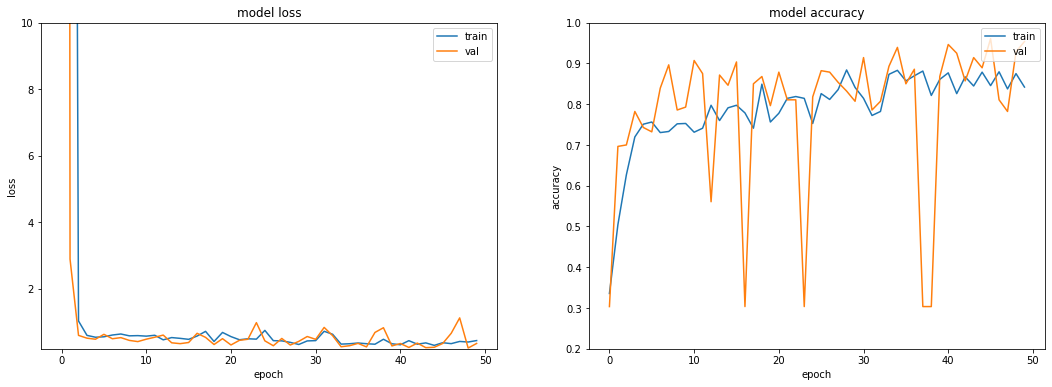

In [10]:
plt.figure(figsize=(18,6))

plt.subplot(121)  

plt.plot(DNN_model.history['loss'],label='train')
plt.plot(DNN_model.history['val_loss'],label='val') 
plt.ylim(0.2,10)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('model loss')
plt.legend(loc=1)

plt.subplot(122)  
plt.plot(DNN_model.history['accuracy'],label='train')
plt.plot(DNN_model.history['val_accuracy'],label='val') 
plt.ylim(0.2,1)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('model accuracy')
plt.legend(loc=1)

# 1-(ii)

Please plot the confusion matrices for (i) as the example in Figure 2.

In [11]:
def plot_confusion_matrix(y_true,y_pred,title):
    conf_matrix = confusion_matrix(y_true, y_pred)
    fig, ax = plt.subplots(figsize=(5, 5))
    ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
    for i in range(conf_matrix.shape[0]):
        for j in range(conf_matrix.shape[1]):
            ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

    plt.xlabel('Predictions', fontsize=18)
    plt.ylabel('Actuals', fontsize=18)
    plt.title(title, fontsize=18)
    plt.show()

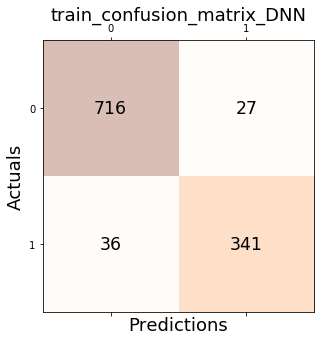

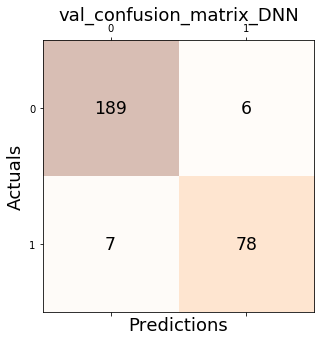

In [12]:
plot_confusion_matrix(y_train,y_dnn_true,'train_confusion_matrix_DNN')
plot_confusion_matrix(y_val,y_dnn_pred,'val_confusion_matrix_DNN')

# 1-(iii)

Precision, recall, F1-score are other ways to evaluate model performance on validation
set. For each class, please record precision, recall and F1-score as well as the averages
of those criteria over all classes in your report.

In [13]:
print('Precision: %.3f' % precision_score(y_val, y_dnn_pred))
print('Recall: %.3f' % recall_score(y_val, y_dnn_pred))
print('Accuracy: %.3f' % accuracy_score(y_val, y_dnn_pred))
print('F1 Score: %.3f' % f1_score(y_val, y_dnn_pred))

Precision: 0.929
Recall: 0.918
Accuracy: 0.954
F1 Score: 0.923


# 1-(iv)

What is the difference between decision tree and random forest?


<font color=blue>
隨機森林(RF, random forest)是用隨機的方式建立許多決策樹，而很多的決策樹組合起來就變成一個森林，對於分類算法來說，對隨機森林輸入新的樣本，森林裡的每個決策樹就會把該樣本分類，以投票的方式看哪一類別被選擇最多次，就預測那一類的樣本。
</font>

# 1-(v)

Please use decision tree and random forest to learn the binary classification
task. Calculate the corresponding Accuracy, Precision, Recall and F1-Score on
validation set.

# Decision tree

In [91]:
dt_gsc = GridSearchCV(DecisionTreeClassifier(random_state=0),
              param_grid={
                  'min_samples_split': range(2, 10),
                  'max_depth': range(1,7),
                  "criterion":["gini", "entropy"] },
                   verbose=0,n_jobs=-1, cv=10, refit=True)

dt_gsc.fit(X_train,y_train)
dt_gsc.best_params_

{'criterion': 'gini', 'max_depth': 3, 'min_samples_split': 2}

In [238]:
dt = DecisionTreeClassifier(criterion=dt_gsc.best_params_['criterion'],max_depth=dt_gsc.best_params_["max_depth"],
                           min_samples_split=dt_gsc.best_params_["min_samples_split"])
dt.fit(X_train,y_train)
y_dt_pred=dt.predict(X_val).flatten()
y_dt_true=dt.predict(X_train).flatten()

In [239]:
print('Precision: %.3f' % precision_score(y_val, y_dt_pred))
print('Recall: %.3f' % recall_score(y_val, y_dt_pred))
print('Accuracy: %.3f' % accuracy_score(y_val, y_dt_pred))
print('F1 Score: %.3f' % f1_score(y_val, y_dt_pred))

Precision: 0.990
Recall: 0.990
Accuracy: 0.993
F1 Score: 0.990


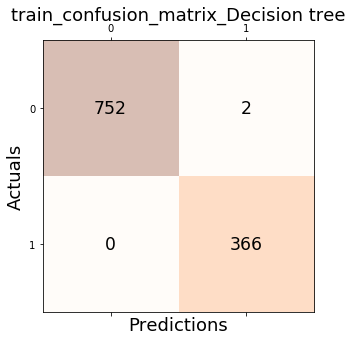

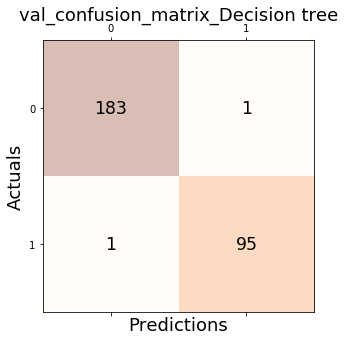

In [240]:

plot_confusion_matrix(y_train,y_dt_true,'train_confusion_matrix_Decision tree')
plot_confusion_matrix(y_val,y_dt_pred,'val_confusion_matrix_Decision tree')

# Random Forest

In [96]:
gsc = GridSearchCV(estimator=RandomForestClassifier(),param_grid={
            'max_features':['sqrt','auto','log2',0.5,0.7],
            'max_depth': range(1,6),
            'n_estimators': range(1,101,10)},
             cv=10,verbose=0,n_jobs=-1,)

grid_result = gsc.fit(X_train,y_train)
best_params = grid_result.best_params_
print(best_params)

{'max_depth': 4, 'max_features': 0.7, 'n_estimators': 11}


In [241]:
rfr = RandomForestClassifier(
    max_depth=best_params["max_depth"], 
    n_estimators=best_params["n_estimators"],
    max_features=best_params['max_features'],
    random_state=False, verbose=False)

rfr.fit(X_train,y_train)

## predict_y
y_rfr_pred=rfr.predict(X_val).flatten()
y_rfr_true=rfr.predict(X_train).flatten()

In [242]:
print('Precision: %.3f' % precision_score(y_val, y_rfr_pred))
print('Recall: %.3f' % recall_score(y_val, y_rfr_pred))
print('Accuracy: %.3f' % accuracy_score(y_val, y_rfr_pred))
print('F1 Score: %.3f' % f1_score(y_val, y_rfr_pred))

Precision: 1.000
Recall: 1.000
Accuracy: 1.000
F1 Score: 1.000


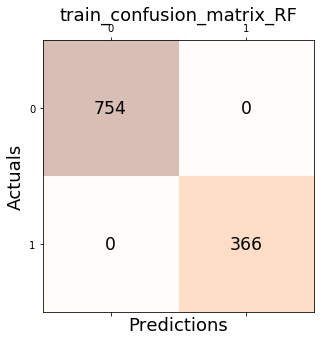

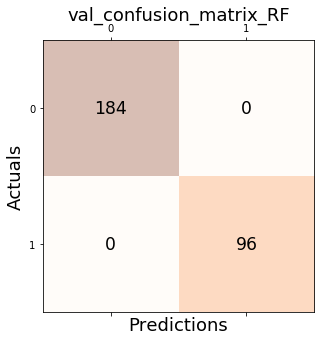

In [243]:
plot_confusion_matrix(y_train,y_rfr_true,'train_confusion_matrix_RF')
plot_confusion_matrix(y_val,y_rfr_pred,'val_confusion_matrix_RF')


# 1-(vi) 

You have to plot the receiver operating characteristic curve (ROC, as shown in Figure 3)
and precision-recall curve (PRC, as shown in Figure 3) with their area-under-curve (AUROC
and AUPRC) for DNN, decision tree and, random forest on the validation set

In [14]:
def plot_static_roc_curve(y_val,y_score,model):
    
    fpr,tpr,threshold = roc_curve(y_val, y_score) 
    plt.plot(fpr, tpr,label=model+' AUC=%0.2f' % auc(fpr, tpr))
    plt.fill_between(fpr, tpr, alpha=.3)

    plt.plot([0,1], [0,1], color="red",linewidth=0.8,linestyle='dashed')
    plt.xlabel("False Positive Rate") 
    plt.ylabel("True Positive Rate")
    plt.title(" Receiver Operating Characteristic curve");
    plt.legend()

In [15]:
def plot_static_PR_curve(y_val,y_score,y_pred,model):
    
    AP=average_precision_score(y_val,y_pred)
    precision,recall,thresholds =  precision_recall_curve(y_val, y_score)
  
    plt.plot(recall,precision,label=model+' AP=%0.2f' % AP)
    plt.fill_between(recall,precision, alpha=.3)
    plt.xlabel("Recall") 
    plt.ylabel("Precision")
    plt.title(" precision-recall curve");
    plt.legend()

# DNN

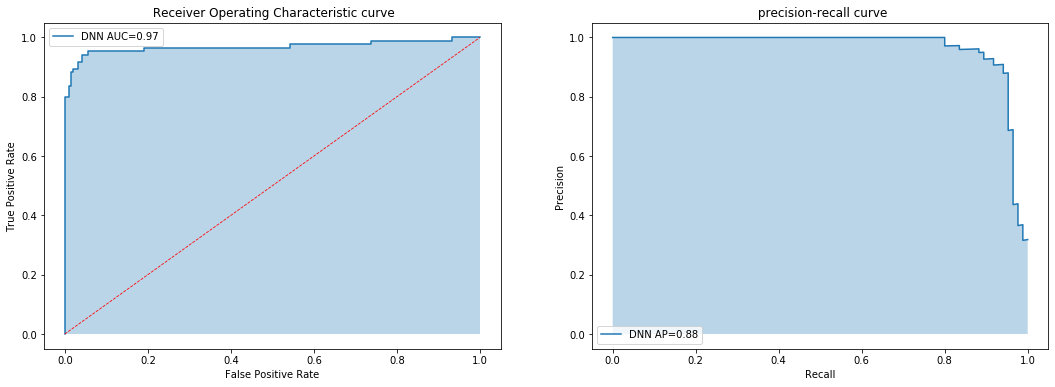

In [16]:
y_score = model.predict(X_val).flatten()

plt.figure(figsize=(18,6))
plt.subplot(121)  
plot_static_roc_curve(y_val,y_score,"DNN")
plt.subplot(122)  
plot_static_PR_curve(y_val,y_score,y_dnn_pred,"DNN")

# Decsion Tree

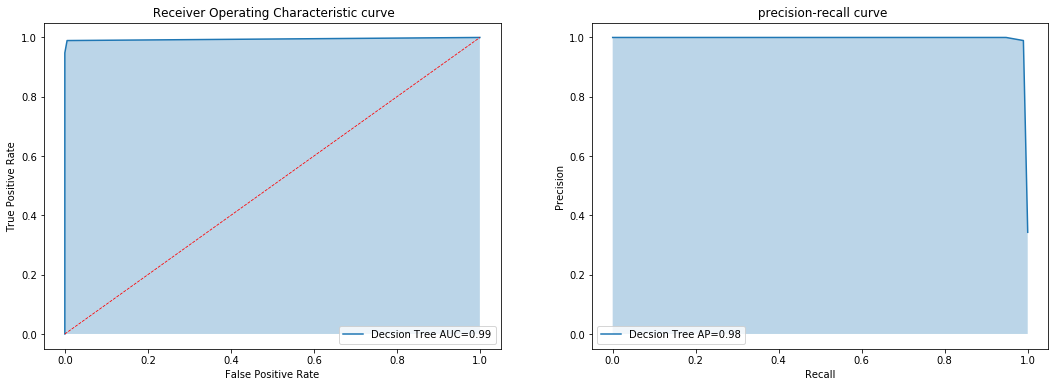

In [134]:
y_score = dt.predict_proba(X_val)[:, 1]

plt.figure(figsize=(18,6))
plt.subplot(121)  
plot_static_roc_curve(y_val,y_score,"Decsion Tree")
plt.subplot(122)  
plot_static_PR_curve(y_val,y_score,y_dt_pred,"Decsion Tree")

# Random Forest

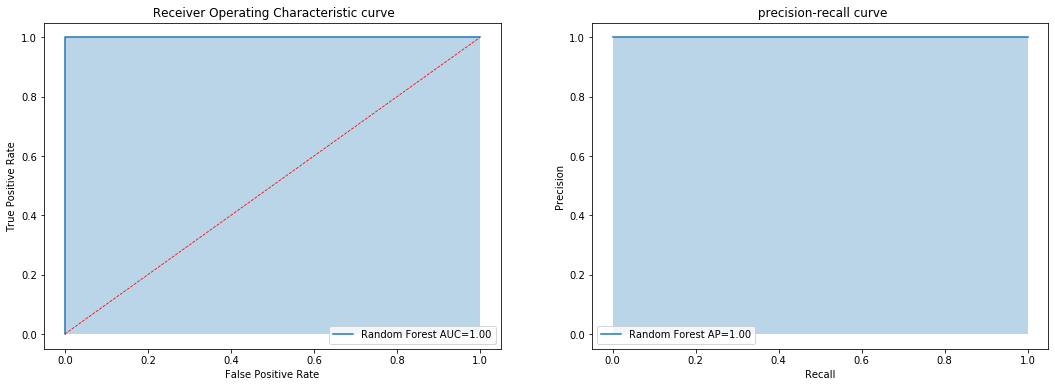

In [136]:
y_score = rfr.predict_proba(X_val)[:, 1]

plt.figure(figsize=(18,6))
plt.subplot(121)  
plot_static_roc_curve(y_val,y_score,"Random Forest")
plt.subplot(122)  
plot_static_PR_curve(y_val,y_score,y_rfr_pred,"Random Forest")